In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
import os
from time import time

In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = ReadoutExperiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:36799
INFO:DRV:      Host server up..............Done 0.06s
INFO:DRV:      Encoding axons/synapses.....Done 15.22s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582453701.7491028
Include dir is : /home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582453701.7491028/initnetwork_0_0.c
gcc -Wall -I/home/seq/05-reward/v0.x/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -st

INFO:DRV:      Compiling Embedded snips....Done 0.62s
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582453701.7491028/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1582453701.7491028/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.48s
INFO:DRV:      Encoding probes.............Done 4.36ms
INFO:DRV:      Configuring registers.......Done 13.95s
INFO:DRV:      Transferring probes.........Done 0.02s
INFO:DRV:      Transferring spikes.........Done 0.03s
INFO:HST:  chip=1 cpu=0 Transfered values 20, 1035, 30 
INFO:HST:  chip=0 cpu=0 Transfered values 20, 1035, 30 
INFO:HST:  chip=1 cpu=0 Reset current/vo

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 16560 to 16590
INFO:HST:  chip=1 cpu=0 Reset functional state at 16590
INFO:HST:  chip=0 cpu=0 Reset functional state at 16590
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 17595 to 17625
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 17595 to 17625
INFO:HST:  chip=1 cpu=0 Reset functional state at 17625
INFO:HST:  chip=0 cpu=0 Reset functional state at 17625
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 18630 to 18660
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 18630 to 18660
INFO:HST:  chip=0 cpu=0 Reset functional state at 18660
INFO:HST:  chip=1 cpu=0 Reset functional state at 18660
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 19665 to 19695
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 19665 to 19695
INFO:HST:  chip=1 cpu=0 Reset functional state at 19695
INFO:HST:  chip=0 cpu=0 Reset functional state at 19695
INFO:HST:  chip=1 cp

/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['CMU Serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


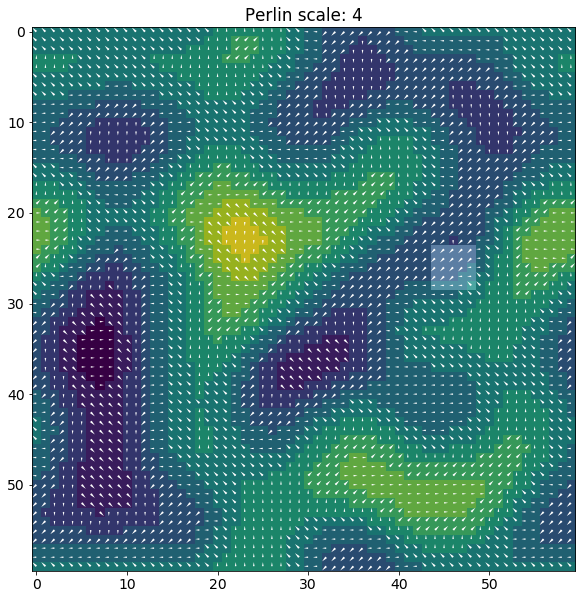

In [5]:
exp.net.plot.landscape()

In [6]:
#p = exp.net.exVoltageProbes[0].plot()

In [7]:
#p = exp.net.inVoltageProbes[0].plot()

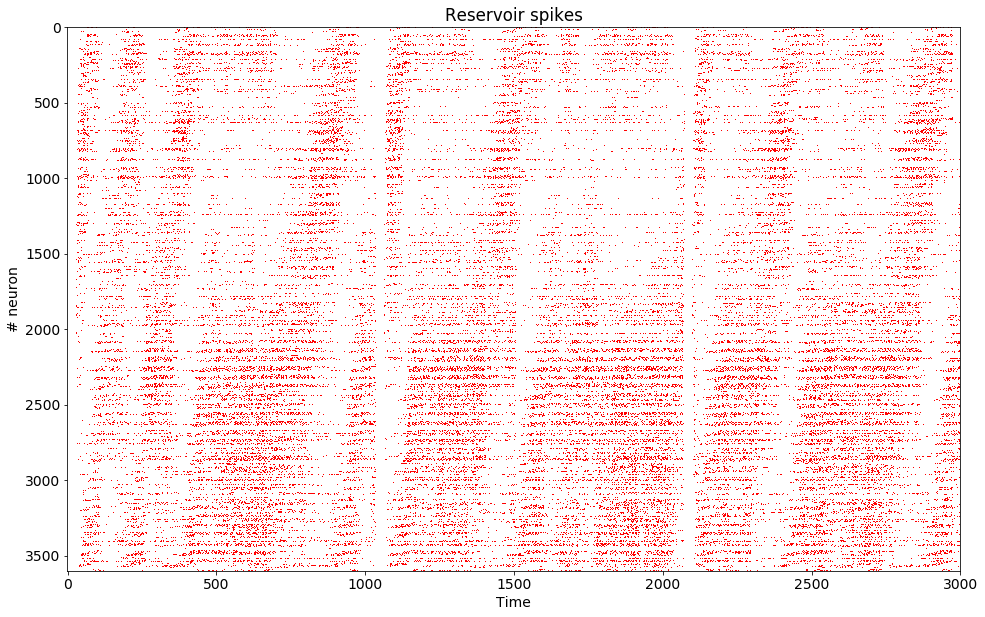

In [8]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=3000)

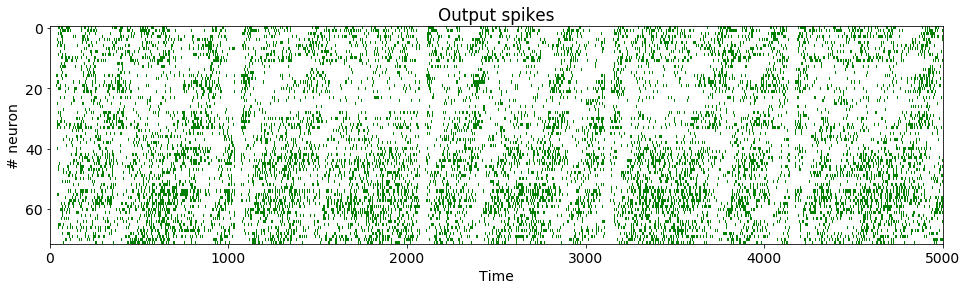

In [118]:
exp.net.plot.outputSpikeTrain(fr=0,to=5000)

In [566]:
offset = exp.p.breakSteps + exp.p.cueSteps + exp.p.cueRelaxation
data = []
for i in range(exp.p.trials):
    fr, to = (i+1)*offset+i*exp.p.movementSteps, (i+1)*offset+(i+1)*exp.p.movementSteps
    data.append(exp.net.outSpikeTrains[:,fr:to])
    #data.append(exp.net.exSpikeTrains[:,fr:to])
    #data.append(exp.net.outVoltageTrains[:,fr:to])
data = np.array(data)

data.shape

(25, 72, 1000)

(0, 700)

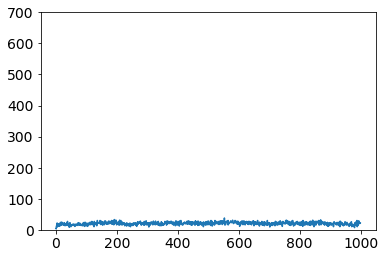

In [11]:
diff01 = np.abs(data[0] - data[2])
p = plt.plot(np.sum(diff01, axis=0))
plt.ylim(0,700)

#plt.figure(figsize=(16, 16))
#p = plt.imshow(diff01)

In [12]:
binSize = 20
bins = np.array([np.mean(data[:, :, i:i+binSize], axis=2) for i in range(0,data.shape[2],binSize)])
bins.shape  # time, trials, neurons

(50, 25, 72)

In [13]:
difs = []
for i in range(1,16):
    dif = np.abs(bins[:,i,:] - bins[:,i+1,:])
    difs.append(dif)
difs = np.array(difs)
    
dif_mean = np.sum(difs, axis=(0,2))/3600
dif_sd = np.std(difs, axis=(0,2))

#p = plt.errorbar(dif_mean, yerr=dif_sd)

In [453]:
data = data[:,:,:-400]
data.shape

(25, 72, 100)

In [197]:
tt = np.vstack([ np.mean(data[:24,:,i+j:i+(j+1)+binSize], axis=2) for j in range(step)])
tt.shape
#np.swapaxes(tt, 0, 1).shape

(48, 72)

In [199]:
np.repeat(target[0:2], 24).shape

(48,)

In [204]:
data.shape

(25, 72, 1000)

In [559]:
import statsmodels.api as sm
from scipy.signal import savgol_filter
import time
import sys

[t,n,s] = data.shape
binSize = 20
l = s-binSize

tgtSin = 1.0-0.1*np.sin((np.pi/(0.3*l))*np.arange(l))
tgtLin = 1+np.arange(l)/l
tgtExp = np.exp(5*np.arange(l)/l)
tgtCon = np.repeat(1.0, l)

# FIXME intercept?

# TODO
# * do regression for at least 2 time steps
def estimate(target):
    yes = []
    t0 = time.time()
    for i in range(0,l,step):
        # Fit
        x = np.mean(data[:24,:,i:i+binSize], axis=2)
        #x = np.vstack([ np.mean(data[:24,:,i:i+j+binSize], axis=2) for j in range(step)])
        #x = np.insert(x, 0, 1.0, axis=1)  # Add intercept?
        y = np.tile(target[i], 24)
        #y = np.tile(target[i:i+step-1, np.newaxis], 24).T
        model = sm.OLS(y, x)
        #params = model.fit().params
        #params = model.fit_regularized(alpha=0.001, L1_wt=0.1).params
        params = model.fit_regularized(alpha=0.0, L1_wt=0.0).params
        # Predict
        xe = np.mean(data[24,:,i:i+binSize], axis=1)
        #xe = np.insert(xe, 0, 1.0, axis=0)  # Add intercept?
        ye = np.dot(xe.T, params)
        yes.append(ye)

        t1 = time.time()
        print("{}/{}, t = {}".format(i+1, l, np.round(t1-t0,2)), end="\r")
    return np.array(yes)

In [560]:
yes1 = estimate(tgtSin)
yes2 = estimate(tgtLin)
yes3 = estimate(tgtExp)
yes4 = estimate(tgtCon)

In [561]:
e1 = np.sum((np.abs(yes1 - tgtSin))/tgtSin)
print(e1)

e2 = np.sum((np.abs(yes2 - tgtLin))/tgtLin)
print(e2)

e3 = np.sum((np.abs(yes3 - tgtExp))/tgtExp)
print(e3)

e4 = np.sum((np.abs(yes4 - tgtCon))/tgtCon)
print(e4)

74.57427709127346
74.57427709127347
74.57427709127344
74.57427709127344


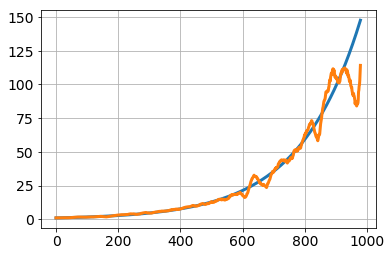

In [562]:
plt.plot(tgtExp, linewidth=3.0)
#plt.plot(savgol_filter(yes3, 201, 1), linewidth=3.0)
#plt.plot(savgol_filter(yes3, 201, 1), linewidth=3.0)
plt.plot(yes3, linewidth=3.0)
#plt.xlim((0,100))
#plt.ylim((0.0,2.0))
#plt.savefig(exp.net.plot.plotDir + 'output_prediction_smoothed.' + exp.p.pltFileType)
plt.grid()

p = plt.show()

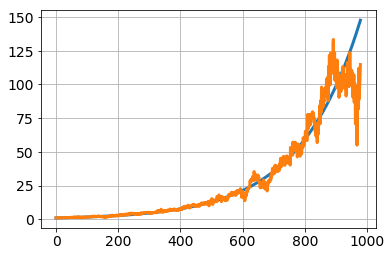

In [557]:
plt.plot(tgtExp, linewidth=3.0)
#plt.plot(savgol_filter(yes3, 201, 1), linewidth=3.0)
#plt.plot(savgol_filter(yes3, 201, 1), linewidth=3.0)
plt.plot(yes3, linewidth=3.0)
#plt.xlim((0,100))
#plt.ylim((0.0,2.0))
#plt.savefig(exp.net.plot.plotDir + 'output_prediction_smoothed.' + exp.p.pltFileType)
plt.grid()

p = plt.show()

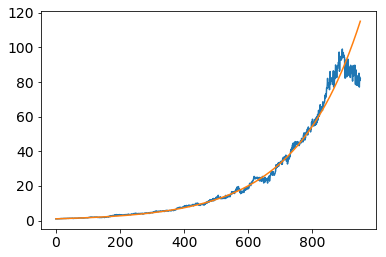

In [254]:
plt.plot(yes2)
plt.plot(target[:-binSize])
#plt.xlim((0,100))
#plt.ylim((0.0,2.0))
plt.savefig(exp.net.plot.plotDir + 'output_prediction.' + exp.p.pltFileType)
p = plt.show()

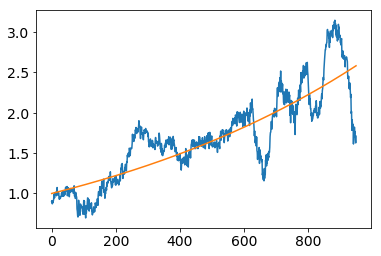

In [150]:
plt.plot(yes2)
plt.plot(target[:-binSize])
#plt.xlim((0,100))
#plt.ylim((0.0,2.0))
plt.savefig(exp.net.plot.plotDir + 'output_prediction_all.' + exp.p.pltFileType)
p = plt.show()

In [347]:
data = data[:,:,:50]

In [348]:
data.shape

(25, 3600, 50)

In [285]:
30*24

720

In [292]:
np.vstack((x[:,0,:], x[:,1,:])).shape

(60, 72)

(1152, 3601)
(48, 3601)


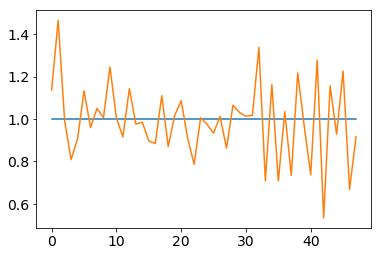

In [358]:
train = data[:24,:,:]
B, N, T = train.shape
binSize = 2

#target = 0.0-0.5*np.sin((np.pi/(0.3*s))*np.arange(s-binSize))
#target = 1+np.arange(s)/s
#target = np.exp(5*np.arange(s-binSize)/s)
target = np.repeat(1.0, s-binSize)

x = np.array([np.mean(train[:,:,i:i+binSize], axis=2) for i in range(T-binSize)])

x = np.vstack(tuple( x[:,i,:] for i in range(B) ))

x = np.insert(x, 0, 1.0, axis=1)  # Add intercept?

print(x.shape)

y = np.tile(target, B)

model = sm.OLS(y, x)
params = model.fit_regularized(alpha=0.0, L1_wt=0.0).params

xe = data[24,:,:-binSize].T
xe = np.insert(xe, 0, 1.0, axis=1)  # Add intercept?

print(xe.shape)

ye = np.dot(xe, params)

plt.plot(target)
plt.plot(ye)
p = plt.show()

In [ ]:
[t,n,s] = data.shape
#target = 1.0-0.1*np.sin((np.pi/(0.3*s))*np.arange(s))
#target = 1+np.arange(s)/s
target = np.exp(5*np.arange(s)/s)
#target = np.repeat(1.0, s)
binSize = 10




yes = []
t0 = time.time()
for i in range(0,s-binSize,step):
    # Fit
    x = np.mean(data[:24,:,i:i+binSize], axis=2)
    #x = np.vstack([ np.mean(data[:24,:,i:i+j+binSize], axis=2) for j in range(step)])
    #x = np.insert(x, 0, 1.0, axis=1)  # Add intercept?
    y = np.tile(target[i], 24)
    #y = np.tile(target[i:i+step-1, np.newaxis], 24).T
    model = sm.OLS(y, x)
    #params = model.fit().params
    #params = model.fit_regularized(alpha=0.001, L1_wt=0.1).params
    params = model.fit_regularized(alpha=0.0, L1_wt=0.0).params
    # Predict
    xe = np.mean(data[24,:,i:i+binSize], axis=1)
    #xe = np.insert(xe, 0, 1.0, axis=0)  # Add intercept?
    ye = np.dot(xe.T, params)
    yes.append(ye)
    
    t1 = time.time()
    print("{}/{}, t = {}".format(i+1, int((s-binSize)/step), np.round(t1-t0,2)), end="\r")
yes1 = np.array(yes)

Parameters set to zero: 0


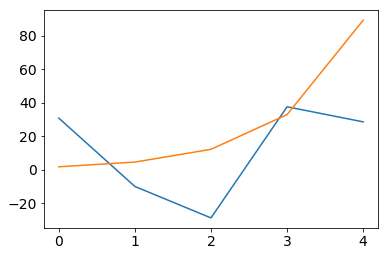

In [311]:
#target = exp.targetFunction
[t,n,s] = data.shape
target = np.exp(5*np.arange(s)/s)

alpha = 0 #0.1 #0.001
l1w= 0 #0.0005
filter = "bins"
binSize = 10

(params, ye, performance) = utils.trainOLS(data[:24], data[24], target, alpha=alpha, l1w=l1w, filter=filter, binSize=binSize)

print('Parameters set to zero: {}'.format(len(params[params==0])))

#plt.title("p = "+str(np.round(performance.cor, 2))+", mse = "+str(np.round(performance.mse, 2)))
plt.plot(ye)
#plt.plot(tgt)
plt.plot(np.array([np.mean(target[i:i+binSize]) for i in range(0,len(target),binSize)]))
p = plt.show()

In [567]:
import os
dirPath = os.getcwd()
#dirPath
#np.save(dirPath+'/data-out_2020-02-25_16-06.npy', data)

In [123]:
binSize = 10

dtrans = []
for i in range(data.shape[0]):
    dataBinned = np.array([np.mean(data[i, :, j:j+binSize], axis=1) for j in range(0,data[i].shape[1],binSize)])
    (d, evals, evecs) = utils.pca(dataBinned.astype(float), dims_rescaled_data=1)
    dtrans.append(d)

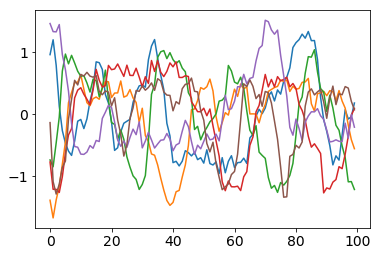

In [124]:
plt.plot(dtrans[0])
plt.plot(dtrans[1])
plt.plot(dtrans[2])
plt.plot(dtrans[3])
plt.plot(dtrans[4])
plt.plot(dtrans[10])

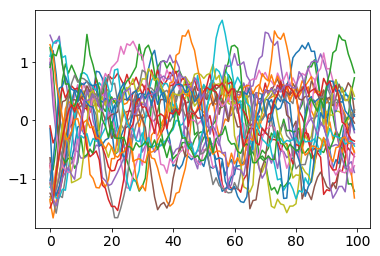

In [125]:
#for i in range(data.shape[0]):

for i in range(25):
    plt.plot(dtrans[i])

In [21]:
#import subprocess
#subprocess.call(shlex.split("jupyter nbconvert notebook.ipynb --to pdf"))